# VISUALIZACIÓN CON PYTHON PARA DATA SCIENCE II

**(PANDAS)**

In [1]:
#Importación de los paquetes vamos a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#Importación de los datos para usar de ejemplos
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## VISUALIZACIÓN CON PANDAS

Como habíamos comentado en la parte I en la mayoría de los trabajos de data science estaremos trabajando con data frames, y seguramente con Pandas.

Por eso la visualización en Pandas será la que usaremos más frecuentemente.

Pandas se basa en Matplotlib pero con unos métodos propios implementados en sus Series y DataFrames que reducen el código y los pasos necesarios para hacer los gráficos.

Además hace una configuración de opciones bastante decente por defecto. Y si queremos personalizarlo más podemos usar las opciones aprendidas en Matplotlib.

Aunque realmente las opciones de personalización de Pandas son las menores de los 3 paquetes, así que si quieres hacer muy personalizado es mejor ir a Matplotlib o a Seaborn.

Un truco que pasa a veces desapercibido es que simplemente con que Seaborn esté importado, aunque no usemos sus funciones, va a cambiar a mejor el aspecto de los gráficos que nos saca Pandas. 

Vamos a aprender a hacer en Pandas los tipos más frecuentes de gráficos y además vamos a profundizar un poco más en los principales parámetros de cada uno.

### CÓMO HACER UN GRÁFICO EN PANDAS

#### 2 FORMAS DE HACER GRÁFICOS EN PANDAS

Se hace con el método plot detrás del dataframe y la variable a representar.

De nuevo hay dos maneras:

* Usando .plot para cualquier tipo de gráfico, pero luego dentro usando el parámetro kind para especificar qué tipo de gráfico es

* Usando .plot.tipo_grafico

Podemos ver los diferentes tipos y todos los parámetros en la documentación: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Nosotros usaremos la segunda forma, pero vamos a ver un ejemplo de cada una para entenderlo

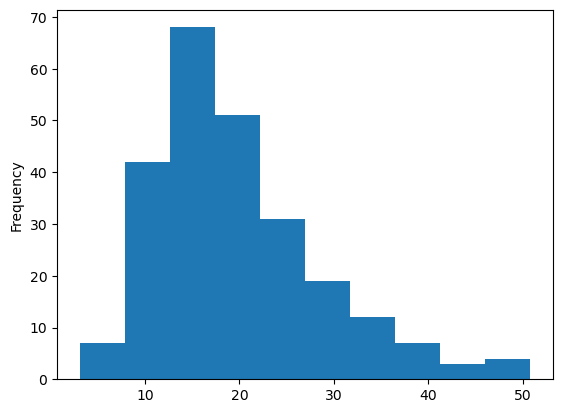

In [60]:
#Con la primera forma
df.total_bill.plot(kind = 'hist');

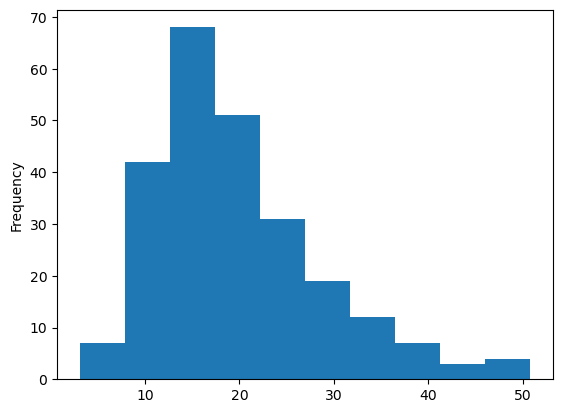

In [61]:
#Con la segunda forma
df.total_bill.plot.hist();

#### COMO USAR TODAS LAS OPCIONES DE MATPLOTLIB EN PANDAS

Hay diferentes opciones de usar lo aprendido en Matplotlib:

1. Pasar métodos de Matplolib como argumentos del método de Pandas
2. Guardar el gráfico en un objeto y usar lo aprendido sobre la API orientada a objetos de Matplotlib
3. Crear el gráfico de Pandas y luego ir añadiendo capas al gráfico con la API funcional de Matplotlib

##### Pasar métodos de Matplolib como argumentos del método de Pandas

Podemos usar la mayoría de las opciones que vimos en Matplotlib directamente dentro de estos métodos de Pandas a través de **kwds.

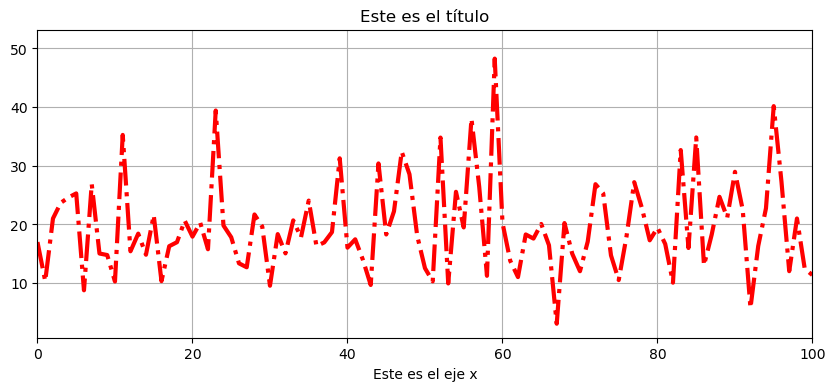

In [62]:
df.total_bill.plot.line(xlim = (0,100),
                        title = 'Este es el título',
                        xlabel = 'Este es el eje x',
                        figsize = (10,4), 
                        ls = '-.', 
                        linewidth = 3, 
                        color = 'red',
                        grid = True);

##### Guardar el gráfico en un objeto y usar lo aprendido sobre la API orientada a objetos de Matplotlib

**Si guardamos un gráfico de Pandas en una variable realmente nos está devolviendo el objeto axes de Matplotlib que va por debajo.**

Ese es el motivo por el cual aquí no estamos creando la figura y el gráfico, el método de Pandas lo crea por nosotros, e inclusole pasa directamente algunos parámetros.

Y después lo podemos seguir personalizando con todo lo que sabemos de la API orientada a objetos de Matplotlib.

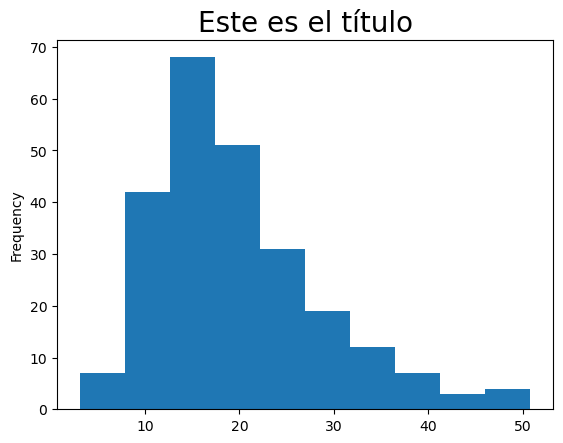

In [63]:
g = df.total_bill.plot.hist()
#Por ejemplo personalizamos el título
g.set_title('Este es el título',fontsize = 20);

También podemos combinar los dos métodos anteriores, es decir, definir parte de las opciones como argumentos y luego otras opciones con la sintaxis orientada a objetos

En el siguiente ejemplo vamos a mezclar los 2 escenarios.

(0.0, 100.0)

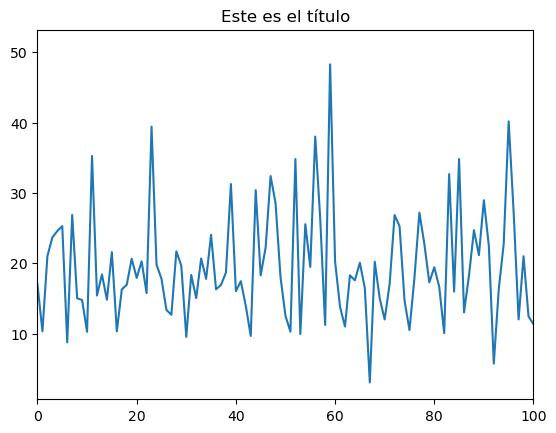

In [64]:
#Vamos a cambiar el tamaño del gráfico, el tipo de línea, el grosor y el color
g = df.total_bill.plot.line(title = 'Este es el título')#Esto es sintaxis Pandas
g.set_xlim(0,100)#Esto es sintaxis matplotlib aunque la opción también está en Pandas con otra sintaxis

##### Crear el gráfico de Pandas y luego ir añadiendo capas al gráfico con la API funcional de Matplotlib

Por último también podemos crear el gráfico con Pandas y luego ir usando la API funcional de Matplotlib por "capas".

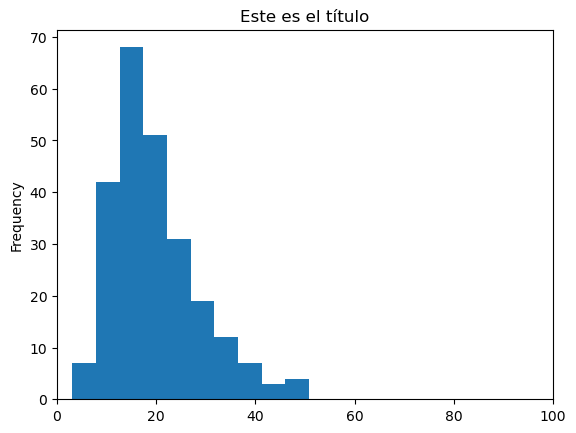

In [65]:
df.total_bill.plot.hist()
plt.title('Este es el título')
plt.xlim(0,100);

#### COMO HACER VARIOS GRAFICOS EN PANDAS

##### REPRESENTAR VARIAS SERIES EN EL MISMO GRAFICO

Podemos incluir varias variables en el mismo gráfico simplemente indexándolas en el dataframe. Ya que pandas intentará representar todas las variables que están antes del método.

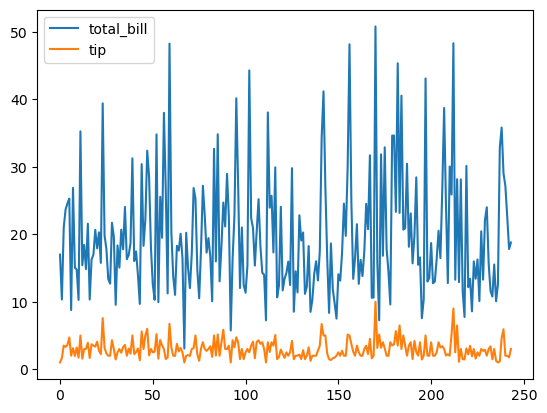

In [66]:
df[['total_bill','tip']].plot.line();

##### VARIOS GRAFICOS SEPARADOS

También podemos pasarle directamente el dataframe y el tipo de gráfico que queremos y Pandas lo sacará automáticamente para todas las variables en las que piense que aplica.

Usar subplots = True para que los haga en gráficos diferentes.

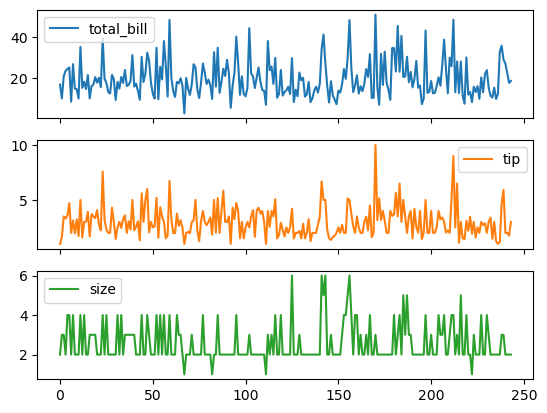

In [67]:
df.plot.line(subplots=True);

Podemos organizar la "parrilla" usando el argumento layout y una tupla con filas-columnas.

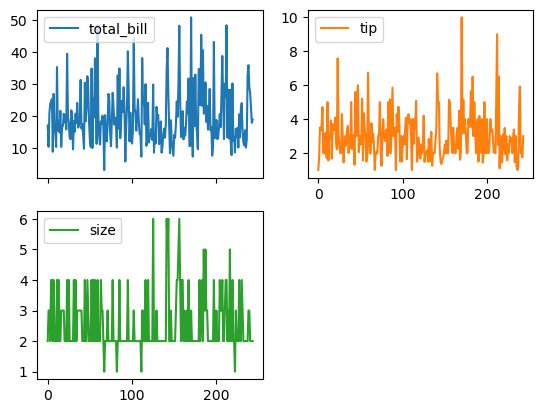

In [68]:
df.plot.line(subplots=True, layout = (2,2));

##### GRAFICOS DE DOS EJES

También podemos poner 2 ejes si fuera necesario especificando cual va en el secundario

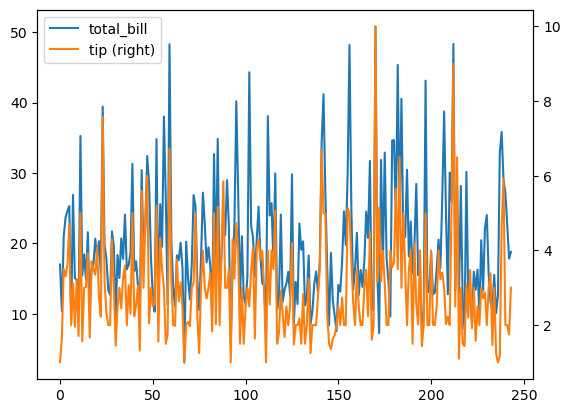

In [69]:
df[['total_bill','tip']].plot.line(secondary_y = 'tip');

### GRÁFICO DE LINEAS

El tipo de gráfico es 'line'.

Lo más importante a entender es que el gráfico de líneas usará el index como el eje de las X para representar la variable que le has pasado.

Por tanto es posible que a veces haya que cambiar el index o trabajar sobre él.

Por ejemplo, si alguna vez te sale un gráfico de lineas entremezclado y sin sentido posiblemente sea por el index que tienes activo.

In [70]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


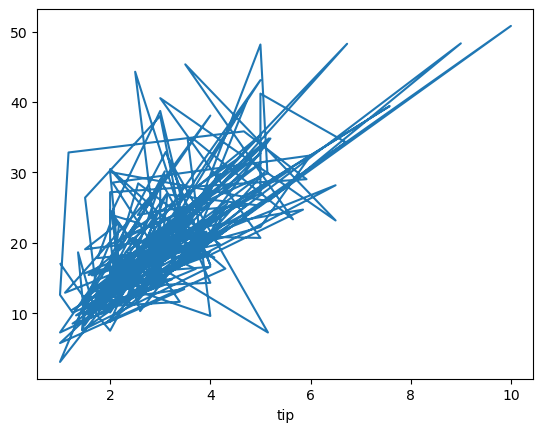

In [71]:
#Ejemplo de un gráfico sobre un index que no tiene sentido
df.set_index('tip').total_bill.plot.line();

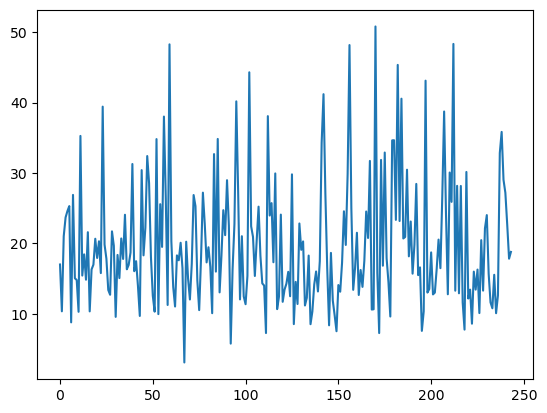

In [72]:
#Ejemplo gráfico de lineas del total de las facturas
df.total_bill.plot.line();

### GRÁFICO DE BARRAS

Se hace con 'bar'.

Lo más importante es recordar que tenemos que pasarle la variable de las x (lo que queremos representar) y la de las y (normalmente será la frecuencia).

Pero seguramente tendremos los datos en bruto, por lo que hay que calcular esas frecuencias a priori.

Lo bueno es que podemos hacerlo "al vuelo" con value_counts() y aplicar el plot directamente (encadenamiento de métodos).

value_counts() hace que salga automáticamente ordendado por frecuencia descendente (que suele ser lo que queremos).

Pero podríamos ordenarlo más inteligentemente usando sort.index()

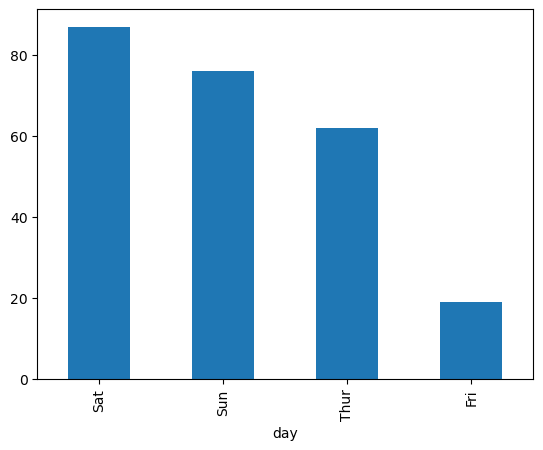

In [73]:
#Con el orden que sale por defecto
df.day.value_counts().plot.bar();

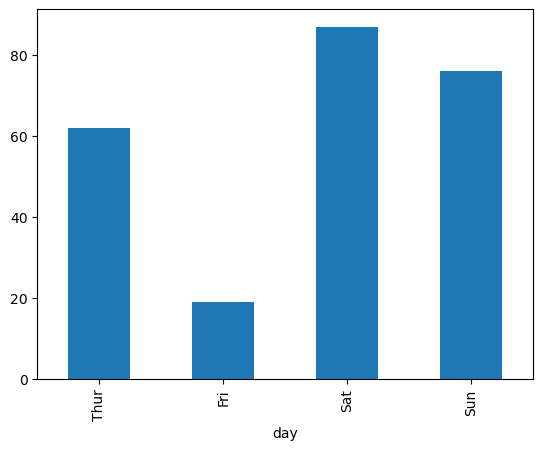

In [74]:
#Con el orden de los días
df.day.value_counts().sort_index().plot.bar();

En el gráfico no hay opción para sacarlo automáticamente en porcentajes, pero podemos prepocesar los datos para convertirlos a porcentaje y luego hacer el gráfico sobre los porcentajes.

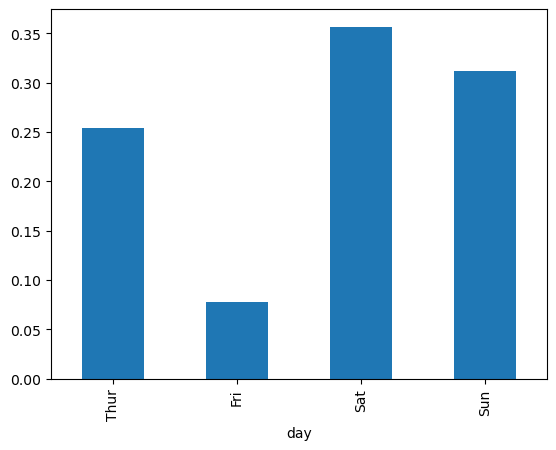

In [75]:
#En porcentaje
df.day.value_counts(normalize=True).sort_index().plot.bar();

Para hacer barras horizontales simplemente usamos barh, pero tendremos que usar ascending = True en el value_counts para que salga en descendente.

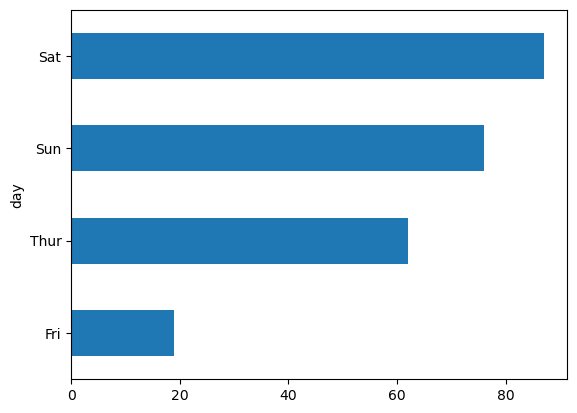

In [76]:
df.day.value_counts(ascending = True).plot.barh();

Si no queremos usar las frecuencias si no otras métricas lo podemos hacer combinando groupby con la función de agregación que queremoas usar.

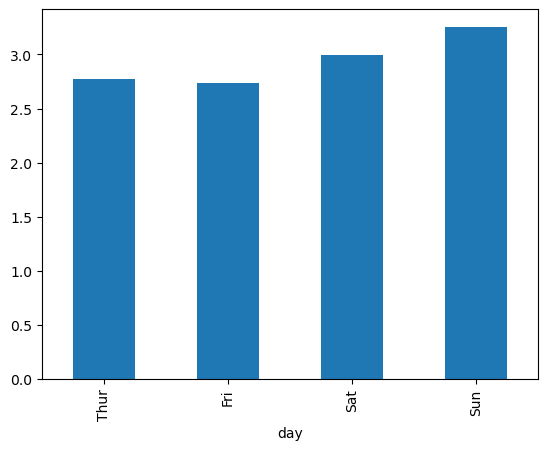

In [77]:
#Por ejemplo vamos a visualizar la propina media por día
df.groupby('day', observed=True).tip.mean().plot.bar();

**Gráficos de barras apilados**

Necesitamos preprocesar una tabla cruzada con las variables que queramos representar y después usar el parámetro stacked=True.

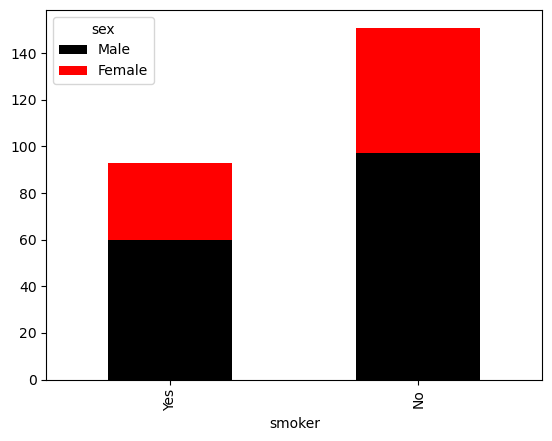

In [78]:
tabla_cruzada = pd.crosstab(df.smoker, df.sex)
tabla_cruzada.plot.bar(stacked=True, color=['black','red']);

### GRÁFICO DE SECTORES

Se hace con .pie() sobre un conteo previo de value_counts().

Con autopct = '%.2f%%' le indicamos que ponga el valor. Podemos cambiar el número para los decimales que queramos.

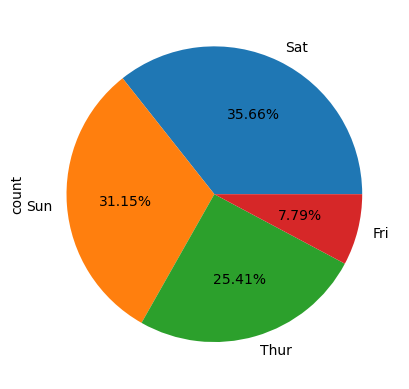

In [79]:
#Con el orden que sale por defecto
df.day.value_counts().plot.pie(autopct = '%.2f%%');

### HISTOGRAMAS

Lo hacemos con hist.

El parámetro más importante con el que tendremos que jugar un poco en cada caso es bins, que es el número de tramos que formarán el histograma.

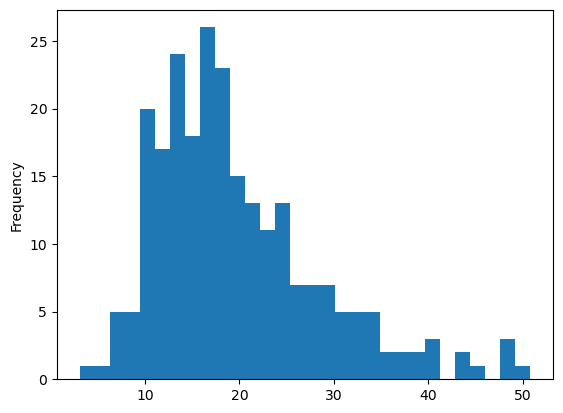

In [80]:
df.total_bill.plot.hist(bins = 30);

Una opción útil es visualizar el histograma de una variable por los diferentes valores de otra.

Por ejemplo si las propinas se distribuyen igual o no en función del día de la semana.

Para ello usamos el método del dataframe en vez del de la serie con los parámetros column y by.

Y si le ponemos sharex = True podremos comparar mejor.

C:\Users\jorge\AppData\Local\Temp\ipykernel_13308\4048663189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist(column = 'tip',  by = 'day', sharex = True);


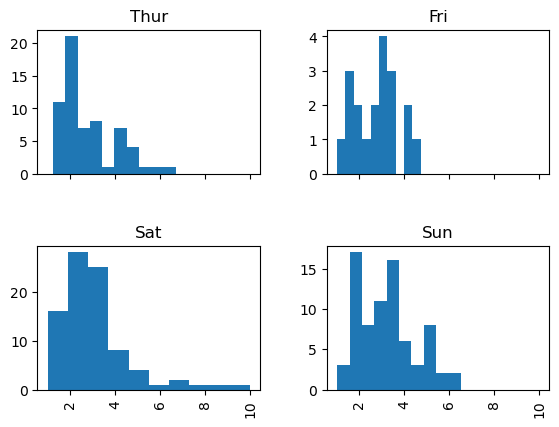

In [84]:
df.hist(column = 'tip',  by = 'day', sharex = True);

### GRÁFICOS DE DENSIDAD

Similares a los histogramas pero en muchos casos más fáciles de visualizar.

Se hacen con el tipo de gráfico kde (estimación de densidad kernel). O con density(), es lo mismo.

<Axes: ylabel='Density'>

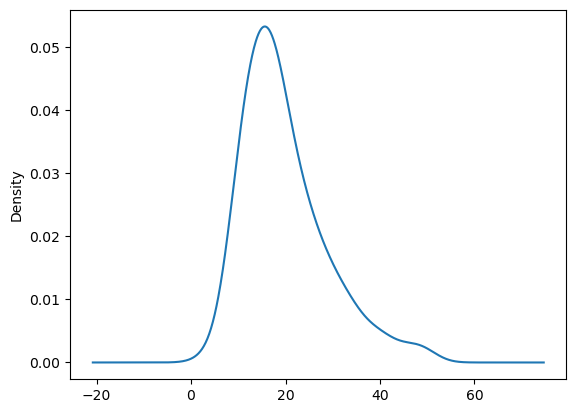

In [85]:
df.total_bill.plot.kde()

<Axes: ylabel='Density'>

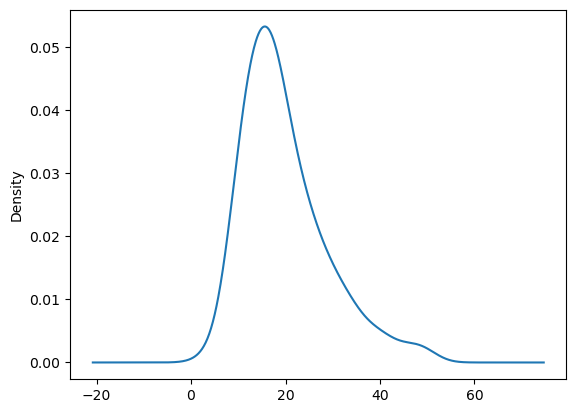

In [86]:
df.total_bill.plot.density()

Recordemos que si hacemos el gráfico sobre todo el dataframe en lugar de sobre una variable nos los sacará para todas las variables en las que aplique (en este caso las numéricas).

Podemos usar eso junto con subplots = True y decirle que aplique la escala de forma libre a cada variable con sharex = False para tener una rápida visualización de la distribución de todas las variables numéricas del dataframe con una sóla línea de código! 

Y ajustamos el layout dependiendo de cuantas variables tengamos.

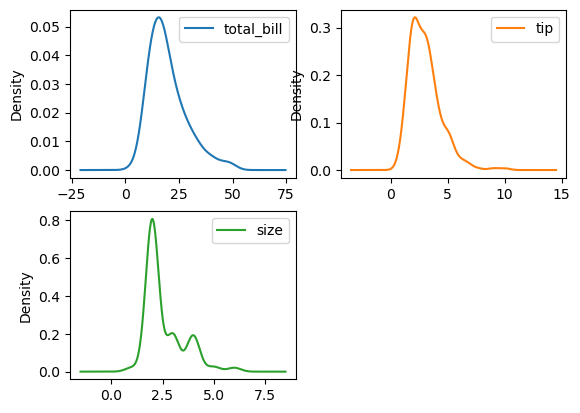

In [87]:
df.plot.kde(subplots = True,sharex=False,layout=(2,2));

### BOX PLOTS

Si sólo queremos ver el gráfico en una variable (por ejemplo para visualizar atípicos) entonces usaremos la sintaxis habitual de dataframe.variable.plot.box()

<Axes: >

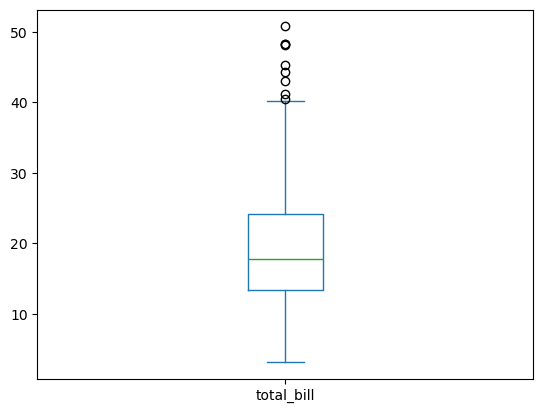

In [88]:
df.total_bill.plot.box()

Pero también son muy útiles para ver si hay diferencias en la distribución de una variable cuantitativa en base a cada valor de otra categórica.

Notar que la sintaxis es un poco diferente. No se hacen sobre dataframe.variable.plot sino directamente sobre dataframe.boxplot() y el método no es box si no boxplot()

La cuantativa va en el parámetro column y la categórica en el parámetro by.

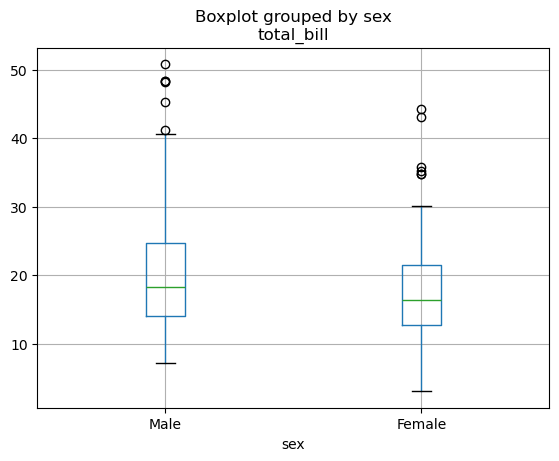

In [89]:
df.boxplot(column='total_bill', by='sex');

### SCATTER PLOTS

Comparan dos variables cuantitativas.

Se hacen con dataframe.plot.scatter y las variables a representar como parámetros.

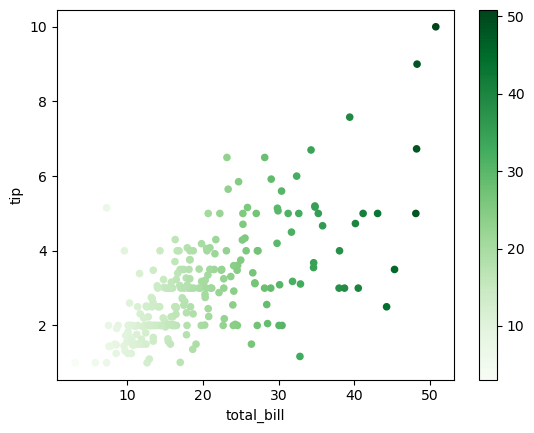

In [90]:
df.plot.scatter('total_bill','tip', c = df.total_bill, colormap='Greens');

Al igual que en Matplolib si queremos asignar una variable categórica al color tenemos que usar sus códigos.

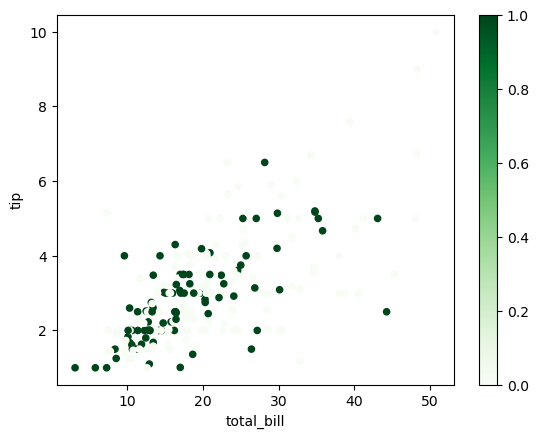

In [91]:
df.plot.scatter('total_bill','tip', c = df.sex.cat.codes, colormap='Greens');

Si hay muchos datos se solaparán unos con otros y será difícil ver patrones. Un truco es usar alpha para que se diferencien zonas de alta y baja densidad. 

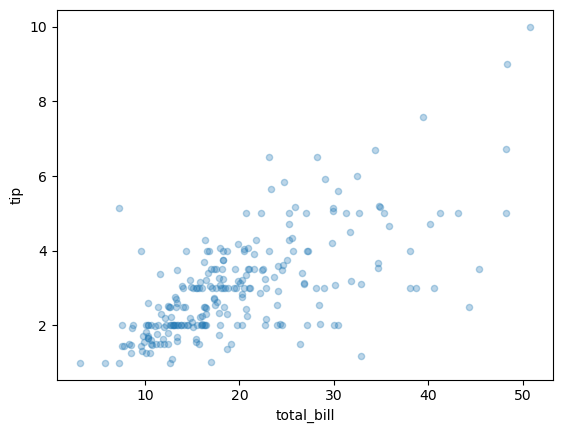

In [92]:
df.plot.scatter('total_bill','tip', alpha = 0.3);

O también se pueden usar gráficos de hexágonos, que colorean cada hexágono en función de su densidad.

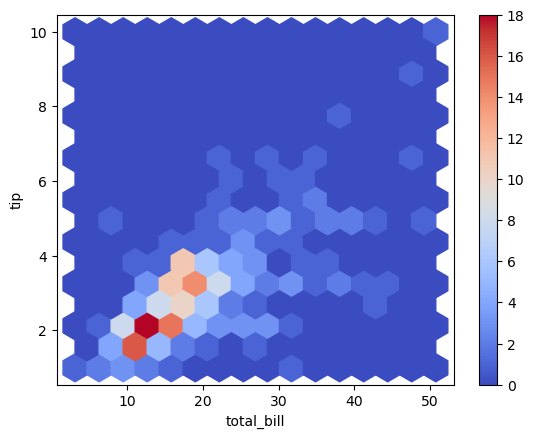

In [93]:
df.plot.hexbin('total_bill','tip',gridsize=15,cmap = 'coolwarm');

## PERSONALIZACIÓN

Como hemos visto la gran mayoría de las opciones se las aplicaremos bien con alguna de las 3 opciones que explicamos más arriba.

Pero vamos a ver aquí otras dos personalizaciones útiles: los estilos y el tamaño de gráfico y etiquetas.

### ESTILOS

Hemos dicho que los gráficos de Pandas son más rápidos pero más "feos".

Es cierto en general, pero también es verdad que tenemos varios estilos preconfigurados que pueden darle un toque más bonito, y que son muy fáciles de aplicar.

Se cambia el estilo con plt.style.use('nombre_estilo')

En esta url puedes verlos todos: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

O si no te hace falta ver ejemplos y sólo quires los nombres de los estilos puedes usar: plt.style.available

In [94]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

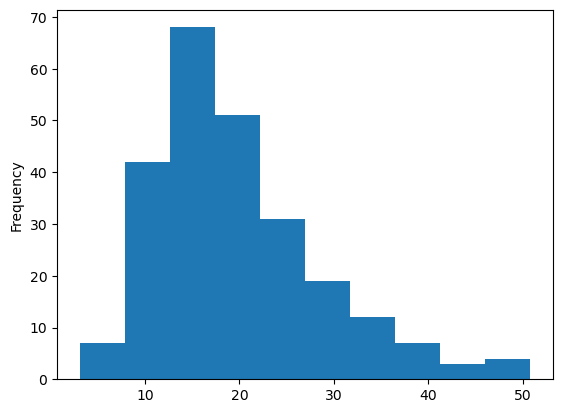

In [95]:
#Con el estilo por defecto
df.total_bill.plot(kind = 'hist');

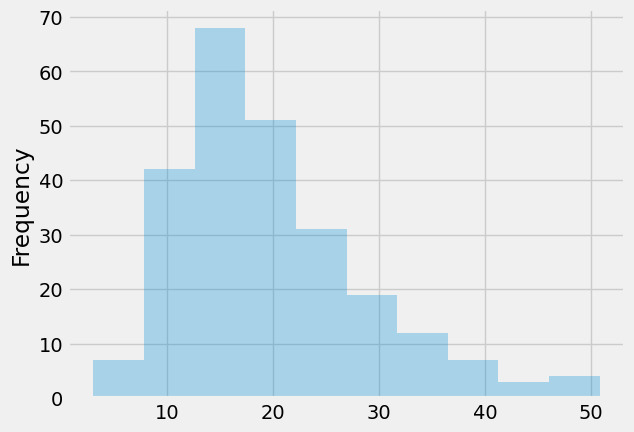

In [96]:
#Con el estilo fivethirtyeight
plt.style.use('fivethirtyeight')
#Y recuerda que también puedes usar los parámetros como alpha clásicos para mejorarlo aún más
df.total_bill.plot(kind = 'hist', alpha = 0.3);

### TAMAÑOS DEL GRÁFICO Y DE LAS ETIQUETAS

Cambiamos el tamaño del gráfico con figsize = (ancho, alto)

Y el de las letras con fontsize.

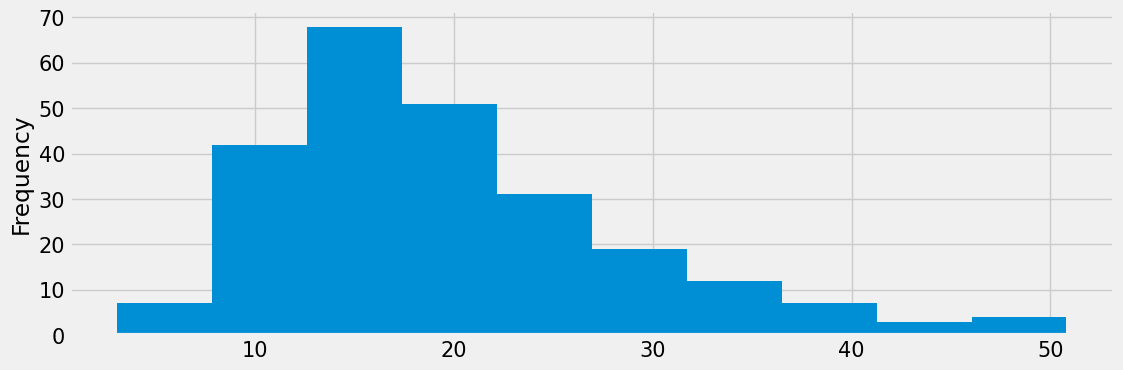

In [97]:
df.total_bill.plot(kind = 'hist', figsize = (12,4), fontsize = 15);

Vemos que los estilos se queadan. Podemos volver a poner el estilo por defecto con 'default'.

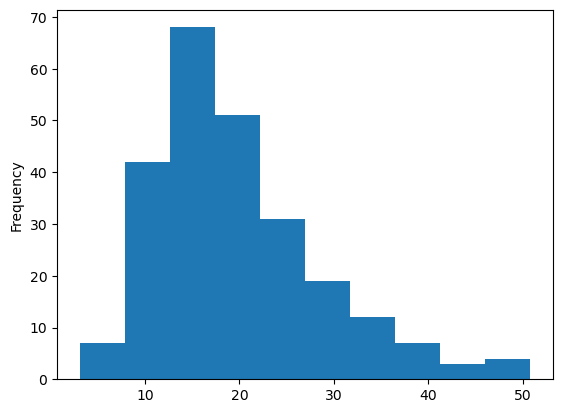

In [98]:
plt.style.use('default')
df.total_bill.plot(kind = 'hist');

## GRÁFICOS DE SERIES Y DE DATAFRAME

Sin haberlo hecho explítico hemos estado utilizando de manera entrelazada los métedos de Series con los de Dataframes.

En la mayoría de las veces no nos tendremos que preocupar por esto, pero sólo por conocerlo:

* cuando hacmos df.variable.plot estamos usando un método de la serie
* cuando hacemos df.plot(x = 'var1', y = 'var2) estamos usando un método de data frame

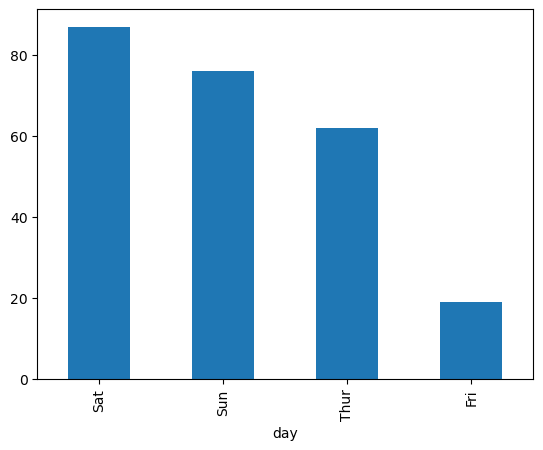

In [99]:
#Este es un método de la serie
df.day.value_counts().plot.bar();

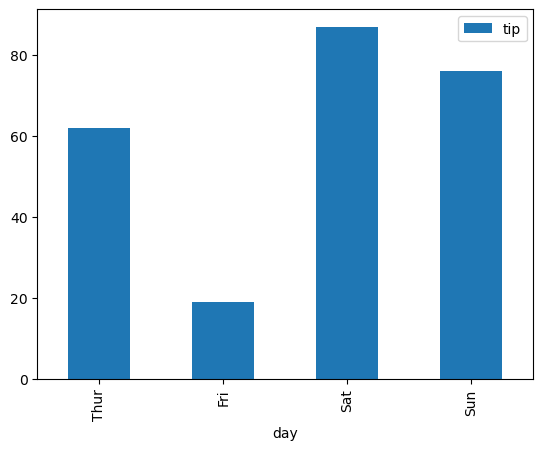

In [101]:
#Este es un método de dataframe
conteo = df.groupby('day', as_index = False, observed=True).tip.count()
conteo.plot(x = 'day', y = 'tip', kind = 'bar');

Los gráficos de data frame sacan gráficos automáticamente para todas las variables para las que el tipo de gráfico aplique. Lo cual puede ser útil en ciertas situaciones.

<Axes: ylabel='Density'>

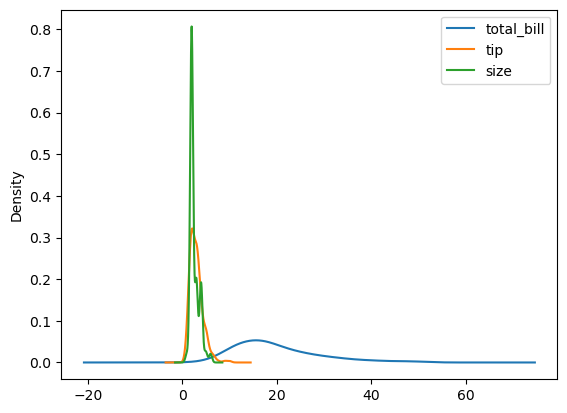

In [102]:
df.plot(kind = 'density')

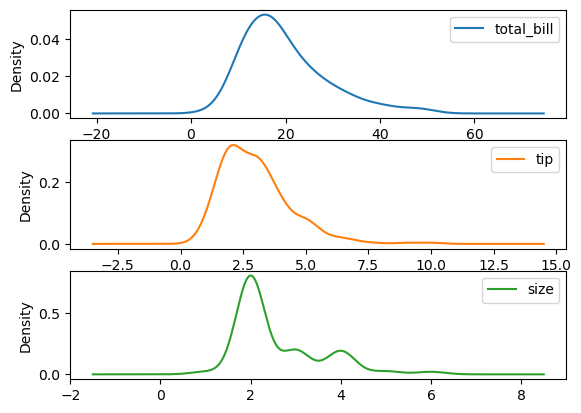

In [103]:
#Podemos decirle que los saque por separado con subplots = True
df.plot(kind = 'density', subplots = True, sharex = False);

Con el método de dataframe podríamos elegir columnas de forma personalizada simplemente indexándolas en el dataframe antes del plot.

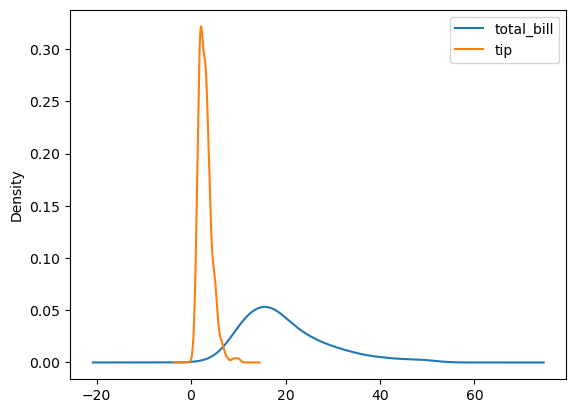

In [104]:
#Ejemplo de representar sólo dos variables pero con el método de dataframe
df[['total_bill','tip']].plot(kind = 'density');